# Naive Bayes

In [1]:
weather = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']
temp = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']
play = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

In [2]:
#label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [3]:
temp_encoded = le.fit_transform(temp)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [4]:
label = le.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model = GaussianNB()
model.fit(features, label)
predicted = model.predict([[0,2]]) #0 cuaca mendung(overcast), 2 suhu sedang(mild)
print(predicted)

[1]


## Naive bayes with multiple labels

In [8]:
from sklearn import datasets
wine = datasets.load_wine()

In [9]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [12]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(y_pred) 

[0 0 1 2 0 1 0 0 1 0 2 2 2 2 0 1 1 0 0 1 2 1 0 2 0 0 1 2 0 1 2 1 1 0 1 1 0
 2 2 0 2 1 0 0 0 2 2 0 1 1 2 0 0 2]


In [15]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9074074074074074


# Decision Tree Classifier

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv', header=None, names=col_names)

In [18]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [19]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [20]:
numer = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp',  'pedigree', 'label']
for col in numer:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [21]:
pima.dropna(inplace=True)

In [22]:
features_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[features_cols]
y = pima.label

In [23]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [25]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6964618249534451


## visualization decision tree

In [27]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [28]:
dot_data = StringIO()
tree.export_graphviz(clf,
    out_file=dot_data,
    class_names=['0', '1'], #target name
    feature_names=features_cols,
    filled=True, #wheater to fill in the boxes with color
    rounded=True, #wheater to round the corners of the box
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

InvocationException: GraphViz's executables not found

## meningkatkan performa dt

# Random Forest

In [29]:
from sklearn import datasets
iris = datasets.load_iris()

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
iris.target #0:setosa, 1:versicolor, 2:virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [37]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [38]:
#sepal length = 3
#sepal width = 5
#petal length = 4
#petal width = 2

rfc.predict([[3, 5, 4, 2]])

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

## important features in scikit learn

In [39]:
feature_imp = pd.Series(rfc.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp


petal length (cm)    0.517479
petal width (cm)     0.348399
sepal length (cm)    0.109679
sepal width (cm)     0.024444
dtype: float64

No handles with labels found to put in legend.


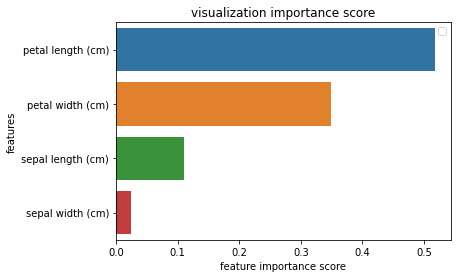

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('feature importance score')
plt.ylabel('features')
plt.title('visualization importance score')
plt.legend()
plt.show()

## genererating model on selected features
### mengahapus fitur sepal length sesuai dengan plot untuk meningkatkan akurasi

In [41]:
x = data[['petal length', 'petal width', 'sepal length']]
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=5)

In [42]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9523809523809523


# SVM

In [43]:
cancer = datasets.load_breast_cancer()

In [44]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [45]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [46]:
x = cancer.data
y = cancer.target

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

In [48]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [49]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9649122807017544


In [50]:
print('Precision: ', metrics.precision_score(y_test, y_pred))

Precision:  0.9811320754716981


In [51]:
print('Recall: ', metrics.recall_score(y_test, y_pred))

Recall:  0.9629629629629629


# Multiple algoritma

In [52]:
import pandas as pd
import numpy as np

In [53]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
train.fillna(train.mean(),inplace=True)
train.isnull().sum()

C:\Users\HP\AppData\Local\Temp/ipykernel_24960/1192414524.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(),inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
train.Loan_Amount_Term = np.log(train.Loan_Amount_Term)

In [59]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

C:\Users\HP\AppData\Local\Temp/ipykernel_24960/526945502.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = train.drop('Loan_Status', 1)


In [60]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)

In [61]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [62]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.metrics import confusion_matrix
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy:  0.7886178861788617
[[18 22]
 [ 4 79]]


## Decision Tree

In [66]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [67]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
matrix1 = confusion_matrix(y_test, y_pred)
print(matrix1)

Accuracy:  0.7642276422764228
[[20 20]
 [ 9 74]]


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [69]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
matrix2 = confusion_matrix(y_test, y_pred)
print(matrix2)

Accuracy:  0.8048780487804879
[[17 23]
 [ 1 82]]


## SVM

In [70]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [71]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
matrix3 = confusion_matrix(y_test, y_pred)
print(matrix3)

Accuracy:  0.6666666666666666
[[ 0 40]
 [ 1 82]]


## Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [73]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
matrix4 = confusion_matrix(y_test, y_pred)
print(matrix4)

Accuracy:  0.7967479674796748
[[21 19]
 [ 6 77]]


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [75]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
matrix5 = confusion_matrix(y_test, y_pred)
print(matrix5)

Accuracy:  0.6260162601626016
[[ 5 35]
 [11 72]]
